In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Import Libraries and Preprocess the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


data = pd.read_csv('/content/drive/MyDrive/task1/Housing.csv')


print(data.head())
print(data.isnull().sum())
print(data.info())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
price               0
area                0
bedrooms            0
bathrooms           0
stories    

In [8]:
data = data.replace({'yes': 1, 'no': 0})

categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

2. Split Data into Train-Test Sets

In [9]:
X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


3. Fit a Linear Regression Model

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

4. Evaluate Model using MAE, MSE, and R²

In [11]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R² Score): {r2}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 970043.4039201637
Mean Squared Error (MSE): 1754318687330.6633
R-squared (R² Score): 0.6529242642153185


5. Plot Regression Line and Interpret Coefficients

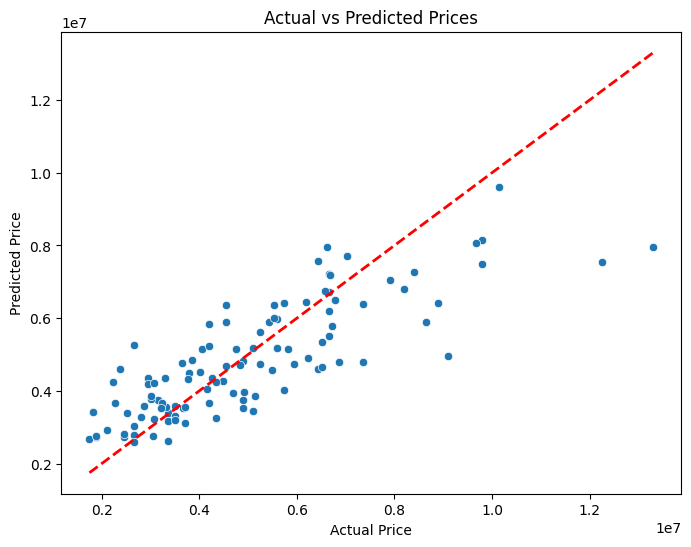

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

6.Interpret Coefficients

In [13]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("\nModel Coefficients:")
print(coefficients)
print(f"\nIntercept: {model.intercept_}")


Model Coefficients:
                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                          mainroad  3.679199e+05
5                         guestroom  2.316100e+05
6                          basement  3.902512e+05
7                   hotwaterheating  6.846499e+05
8                   airconditioning  7.914267e+05
9                           parking  2.248419e+05
10                         prefarea  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05

Intercept: 260032.35760741122
